<a href="https://colab.research.google.com/github/LayanAltaweel1/Mining-project-/blob/main/IT326Project_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT326: Data Mining Project - Phase 2
## Project Title: Diabetes Diagnosis Analysis

**Team Members:**
1. **Layan** - Feature Selection (Spearman Correlation)
2. **sara** - Data Cleaning & Missing Values
3. **retal** - Outlier Detection & Handling
4. **reema** - Data Transformation & Scaling
5. **remas** - Exploratory Data Analysis (EDA)

**Research Reference:** Based on the methodology of *Wei Zhu* regarding significant factors for diabetes.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

paths = [
    '/content/sample_data/diabetes_data.csv',
    '/content/diabetes_data.csv',
    'diabetes_data.csv'
]

df = None
for p in paths:
    if os.path.exists(p):
        df = pd.read_csv(p)
        print(f"Success! Loaded from: {p}")
        break

if df is not None:
    display(df.head())
else:
    print("Error: File not found! Please make sure you uploaded the file to the folder on the left.")


Success! Loaded from: /content/sample_data/diabetes_data.csv


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


## **1. Data Cleaning & Missing Values**
In this step, we perform initial data sanitization. This involves checking for any null entries or duplicate records that might compromise the model's integrity.



In [27]:
# Missing values
missing_values = df.isnull().sum()

missing_table = pd.DataFrame({
    "Missing Values": missing_values,

})

missing_table

,Missing Values
PatientID,0
Age,0
Gender,0
Ethnicity,0
SocioeconomicStatus,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0


### Missing Values Analysis

After checking all columns, the dataset contains 0 missing values across all 46 attributes.

Since no missing values were found, no imputation techniques such as mean, median, mode replacement, or row deletion were required.

This indicates that the dataset is complete and suitable for further preprocessing.

In [28]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


### Duplicate Records Analysis

The dataset contains 0 duplicate rows.

Therefore, no duplicate records were removed.

## **2.outlier detection and handling**
In this step, we focus on identifying and managing outliers. Outliers can skew statistical results and reduce the accuracy of machine learning models.

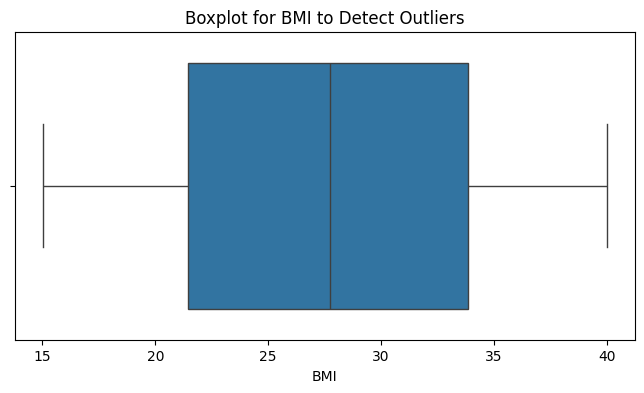

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers in a key numerical column (e.g., BMI)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['BMI'])
plt.title('Boxplot for BMI to Detect Outliers')
plt.show()



### Boxplot observation
Based on the plot, the data appears relatively consistent within a realistic range for BMI, with no extreme outliers requiring removal at this stage.

In [30]:
# Handling outliers using logical constraints (e.g., Age cannot be > 110)
# We filter the dataframe to keep only realistic records
df = df[df['Age'] <= 110]

print("Outlier detection and removal completed.")

Outlier detection and removal completed.


### handling outliers using logical constraints
The dataset is now refined and contains only realistic logical records for further analysis.

# 3.Data Transformation & Scaling



In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding Categorical columns (Gender, Ethnicity, etc.)
le = LabelEncoder()
categorical_features = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking']

for col in categorical_features:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

# Scaling numerical features to a standard range
scaler = StandardScaler()
numerical_cols = ['BMI', 'FastingBloodSugar', 'SystolicBP', 'HbA1c']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Data transformation and scaling completed successfully.")

Data transformation and scaling completed successfully.


### 4. Feature Selection
**What are we doing?**
We are selecting the top 10 health factors that have the strongest relationship with Diabetes.

**Why Spearman?**
This method is used in our reference research paper because it is perfect for medical data and handles non-linear relationships effectively.

Layan's Top 10 Features Selected:
 ['FastingBloodSugar', 'HbA1c', 'FrequentUrination', 'Hypertension', 'ExcessiveThirst', 'UnexplainedWeightLoss', 'DiastolicBP', 'Smoking', 'SystolicBP', 'FamilyHistoryDiabetes']


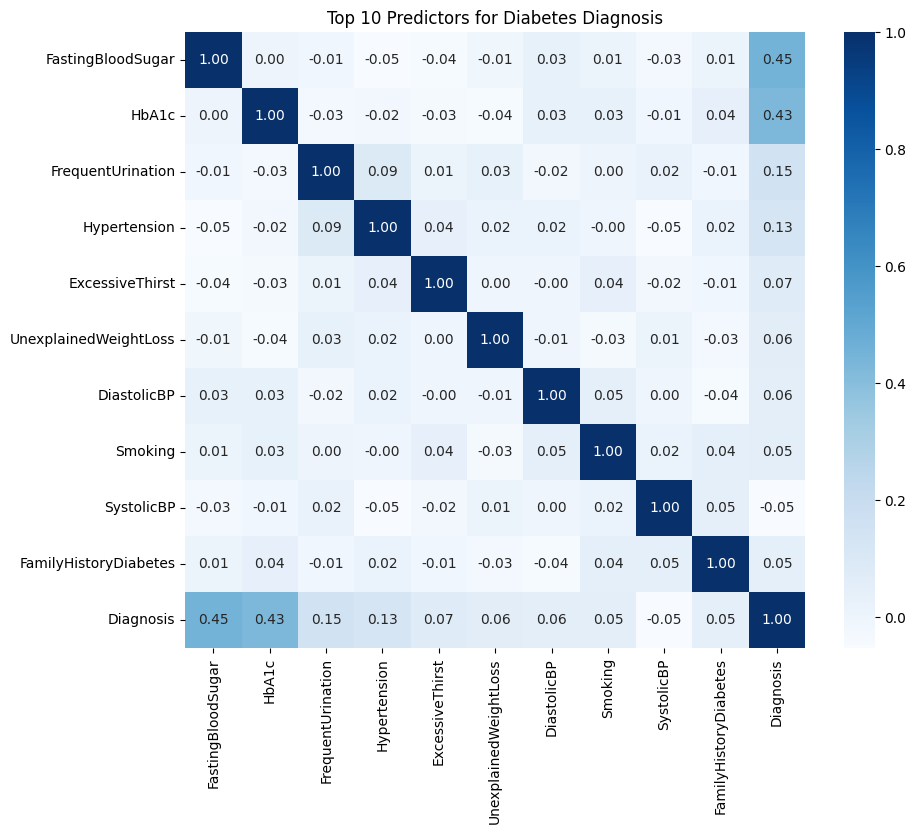

In [32]:
# 1. Filter numeric columns only to avoid errors with text data
numeric_data = df.select_dtypes(include=[np.number])

# 2. Calculate Spearman Correlation with 'Diagnosis'
# .abs() ensures we get the strongest predictors (positive or negative)
correlations = numeric_data.corr(method='spearman')['Diagnosis'].abs().sort_values(ascending=False)

# 3. Select Top 10 Features (skipping 'Diagnosis' itself at index 0)
my_top_10 = correlations.iloc[1:11].index.tolist()

print("Layan's Top 10 Features Selected:\n", my_top_10)

# 4. Create a Heatmap for these specific features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df[my_top_10 + ['Diagnosis']].corr(method='spearman'),
            annot=True,
            cmap='Blues',
            fmt='.2f')
plt.title('Top 10 Predictors for Diabetes Diagnosis')
plt.show()

# 5. Save this subset for the next Phase
df_final = df[my_top_10 + ['Diagnosis']]

### 5. Exploratory Data Analysis (EDA)
**Objective:**  Visualizing the data to understand the distribution of the target variable (Diagnosis).
Exporting the final preprocessed dataset for Phase 3.

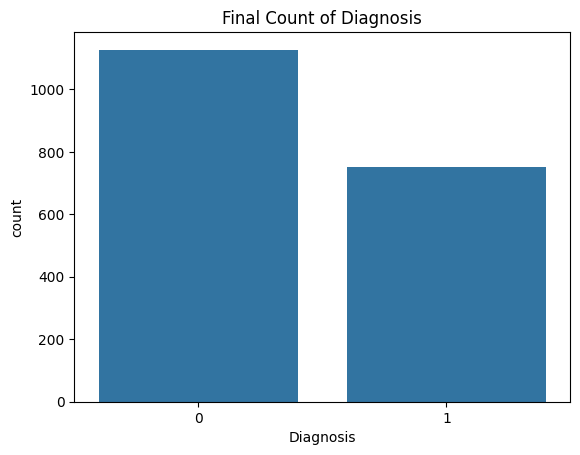

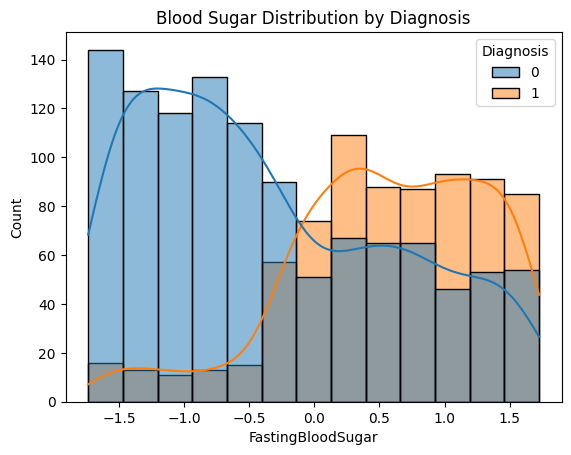

All done! The final dataset is saved as 'Preprocessed_dataset.csv'


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Visualize how many people have Diabetes (1) vs Healthy (0)
# This helps us see if the data is balanced
sns.countplot(x='Diagnosis', data=df_final)
plt.title('Final Count of Diagnosis')
plt.show()

# 2. Visualize the distribution of Blood Sugar
# This shows how the most important feature looks now
sns.histplot(data=df_final, x='FastingBloodSugar', hue='Diagnosis', kde=True)
plt.title('Blood Sugar Distribution by Diagnosis')
plt.show()

# 3. Save the final dataset with the top 10 features for Phase 3
df_final.to_csv('Preprocessed_dataset.csv', index=False)

print("All done! The final dataset is saved as 'Preprocessed_dataset.csv'")

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
